## Machine Learning Application
### Mini-project: Song Recommendation 
#### Member: 
    - Tran Hai Linh
    - Le Thi Hoa 
    - Myrfa 

## Import required libraries
            

In [2]:
#Essential libraries for data representation
import pandas as pd
import numpy as np

#Display and plotting libraries
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

#Statistics libraries
from scipy import stats
from collections import Counter

#ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

# For dimension reduction
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA

#DNN libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

## Read data from csv file
- display 5 first rows and 5 bottom rows

In [3]:
df = pd.read_csv("song_dataset.csv")
df.head()

,user,song,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0


In [4]:
df.tail()

,user,song,play_count,title,release,artist_name,year
102622,21f4ac98aa1665bd42027ba12184a939ff435f59,SOKAKHH12AF72A5BAF,3,87,Hopeless Romantic,Bouncing Souls,1999
102623,21f4ac98aa1665bd42027ba12184a939ff435f59,SONPOXM12A8C1440C2,4,Space Olympics,Incredibad,The Lonely Island,2009
102624,21f4ac98aa1665bd42027ba12184a939ff435f59,SOPREHY12AB01815F9,8,I'm On A Boat,Incredibad,The Lonely Island / T-Pain,2009
102625,21f4ac98aa1665bd42027ba12184a939ff435f59,SOQXKUV12A6D4FB4C9,3,Amityville,The Marshall Mathers LP,Eminem / Bizarre,2000
102626,21f4ac98aa1665bd42027ba12184a939ff435f59,SOSJRJP12A6D4F826F,18,Master Of Puppets,Master Of Puppets,Metallica,1986


## Basic information

In [5]:
# Shape of data 
print(f"The size of the data: {df.shape[0]} rows, {df.shape[1]} columns")

The size of the data: 102627 rows, 7 columns


In [6]:
# Name of columns 
print("The columns of the song dataset: \n")
print(df.columns)

The columns of the song dataset: 

Index(['user', 'song', 'play_count', 'title', 'release', 'artist_name',
       'year'],
      dtype='object')


In [7]:
# basic information including Column, Count, Dtype, Non-Null  
print("General information about dataset: \n")
print(df.info())

General information about dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102627 entries, 0 to 102626
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user         102627 non-null  object
 1   song         102627 non-null  object
 2   play_count   102627 non-null  int64 
 3   title        102627 non-null  object
 4   release      102627 non-null  object
 5   artist_name  102627 non-null  object
 6   year         102627 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.5+ MB
None


In [8]:
# Basic Statictiscal
print("Basic statistical: \n")
df.describe() 

Basic statistical: 



,play_count,year
count,102627.000000,102627.000000
mean,2.885790,1624.812389
std,8.569376,781.595402
min,1.000000,0.000000
25%,1.000000,1984.000000
50%,1.000000,2002.000000
75%,3.000000,2007.000000
max,1890.000000,2010.000000


#### missing value

In [9]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("The count of missing values for each column: ")
missing_values

The count of missing values for each column: 


user           0
song           0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64

In [10]:
# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Display the percentage of missing values for each column
print("The count of missing values for each column: \n")
missing_percentage

The count of missing values for each column: 



user           0.0
song           0.0
play_count     0.0
title          0.0
release        0.0
artist_name    0.0
year           0.0
dtype: float64

#### Duplicate values

In [11]:
# Check for duplicates in the song dataset
duplicates = df.duplicated()

# Calculate the percentage of duplicate rows
duplicate_percentage = (duplicates.sum() / len(df)) * 100

# Display result
print(f"\nTotal number of duplicate rows: {duplicates.sum()}")
print(f"Percentage of duplicate: {duplicate_percentage:.2f}%")


Total number of duplicate rows: 1055
Percentage of duplicate: 1.03%


In [12]:
df[duplicates].head(10)

,user,song,play_count,title,release,artist_name,year
10,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
197,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SOVEUVC12A6310EAF1,5,Just Lose It,Curtain Call,Eminem,2004
311,b64cdd1a0bd907e5e00b39e345194768e330d652,SOLQYOG12B0B80BA71,2,The Prime Time Of Your Life,Human After All,Daft Punk,2005
771,5a905f000fc1ff3df7ca807d57edb608863db05d,SOLQYOG12B0B80BA71,2,The Prime Time Of Your Life,Human After All,Daft Punk,2005
898,5a905f000fc1ff3df7ca807d57edb608863db05d,SORRCNC12A8C13FDA9,1,Is This It,Is This It,The Strokes,2001
949,5a905f000fc1ff3df7ca807d57edb608863db05d,SOUZBUD12A8C13FD8E,1,Killing Lies,First Impressions Of Earth,The Strokes,2005
1360,bd8475385f0aa78830fa6dfce9e7242164b035c8,SOAVWHY12AB017C6C0,1,Losing Touch,Day & Age,The Killers,2008
1385,bd8475385f0aa78830fa6dfce9e7242164b035c8,SOETQJP12A6D4F6731,1,Not Big,Alright_ Still,Lily Allen,2006
1443,bd8475385f0aa78830fa6dfce9e7242164b035c8,SONVJUL12A6701FB7A,1,The Damage In Your Heart,Make Believe,Weezer,2005
1465,bd8475385f0aa78830fa6dfce9e7242164b035c8,SOSDTGC12AF72A2BC3,1,Chinese,It's Not Me_ It's You,Lily Allen,2009


In [13]:
# Use nunique() to count the number of unique values in each column
unique_counts = df.nunique()

# Display the number of unique values 
print(f"number of unique values: \n\n{unique_counts}")

number of unique values: 

user            2042
song           44458
play_count       129
title          40382
release        20164
artist_name    11928
year              66
dtype: int64


#### Get a count of the 'None', 'Null' & empty string and zero values

In [14]:
# Function to check for NULL, None, empty string, and 0 values"
def check_values(value):
    return value == "Null" or value is None or value == '' or value == "0" or value == 0

# Check for each columns
result = df.applymap(check_values).sum()

# Calculate percentage
percentage_result = (result / len(df)) * 100

# Show result
result_df = pd.DataFrame({
    'Count': result, 
    'Percentage': percentage_result})

print("The number of rows containing Null, None, empty string, or 0 values is:")
result_df

The number of rows containing Null, None, empty string, or 0 values is:


,Count,Percentage
user,0,0.000000
song,0,0.000000
play_count,0,0.000000
title,0,0.000000
release,0,0.000000
artist_name,0,0.000000
year,19283,18.789402


#### check outliers

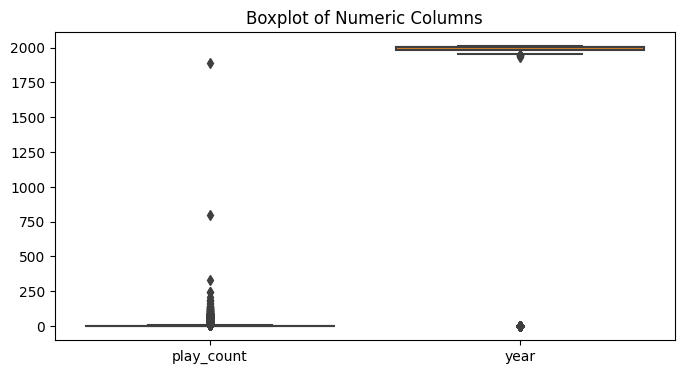

In [15]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df)
plt.title("Boxplot of Numeric Columns")
plt.show()

## Data Cleaning

### Remove outliers

#### Play_count


In [16]:
# Determine the values Q1 and Q3
Q1 = df['play_count'].quantile(0.25)
Q3 = df['play_count'].quantile(0.75)

# Determine the "interquartile range" (IQR)
IQR = Q3 - Q1

# Determine lower and upper thresholds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display lower and uppoer bound
print("Lower bound of play_count value: ", lower_bound)
print("Upper bound of play_count value: ", upper_bound)

# Remove lines containing outliers
df_song = df[(df['play_count'] >= lower_bound) & (df['play_count'] <= upper_bound)]

# Display the size of the song dataset after removing play_count outliers
print(f"The size of the dataset: {df_song.shape[0]} rows  - {df_song.shape[1]} columns")

Lower bound of play_count value:  -2.0
Upper bound of play_count value:  6.0
The size of the dataset: 94100 rows  - 7 columns


### Remove duplicate values

In [17]:
# Remove rows with duplicate values based on all columns
df_song = df_song.drop_duplicates()

# Display the size of the song dataset after removing duplicate values.
print(f"The size of the song dataset : {df_song.shape[0]} rows - {df_song.shape[1]} columns")

The size of the song dataset : 93099 rows - 7 columns


### Process value 0 in column year

## Use Case 1  Removing rows have value 0 in column year 

In [18]:
# Remove lines containing outliers
df_0 = df_song[df_song["year"] != 0]
df_0

,user,song,play_count,title,release,artist_name,year
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,12 segundos de oscuridad,10 + Downloaded,Jorge Drexler,2006
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1,Ears To The Ground (Album Version),Under Cold Blue Stars,Josh Rouse,2002
...,...,...,...,...,...,...,...
102619,21f4ac98aa1665bd42027ba12184a939ff435f59,SOFKFLV12A8C142605,4,Leave Dat Boy Alone,D-12 World,D-12,2004
102621,21f4ac98aa1665bd42027ba12184a939ff435f59,SOIRJGI12AF72A3A57,3,Like A Boss,Incredibad,The Lonely Island,2009
102622,21f4ac98aa1665bd42027ba12184a939ff435f59,SOKAKHH12AF72A5BAF,3,87,Hopeless Romantic,Bouncing Souls,1999
102623,21f4ac98aa1665bd42027ba12184a939ff435f59,SONPOXM12A8C1440C2,4,Space Olympics,Incredibad,The Lonely Island,2009


## Exploratory Data Analysis
- What are the most listened songs?
- Who are the most popular artists?
- How is the distribution of song count for users?

### What are the most listened songs?

In [19]:
# Calculate the total number of listens for each song
total_listen_count = df_0.groupby('title')['play_count'].sum()

# sorted by total number of listens in descending order
most_listened_songs = total_listen_count.sort_values(ascending=False)

# Displays the 10 most listened to songs
top_10_songs = pd.DataFrame(most_listened_songs.nlargest(10))

# Show result
print("Top 10 most listened songs with total listen count:")
top_10_songs

Top 10 most listened songs with total listen count:


,play_count
title,
Use Somebody,340
Undo,333
Secrets,320
You're The One,316
Somebody To Love,293
Yellow,285
Revelry,281
Love Story,268
Fireflies,242


### Who are the most popular artists?

In [20]:
# the total number of listens for each artist
total_listen_count_by_artist = df_0.groupby('artist_name')['play_count'].sum()

# Sort by total number of listens in descending order
most_popular_artists = total_listen_count_by_artist.sort_values(ascending=False)

# Showing the 10 most popular artists
top_10_artists = pd.DataFrame(most_popular_artists.head(10))

# Display result 
top_10_artists

,play_count
artist_name,
Coldplay,1367
The Black Keys,1152
Kings Of Leon,966
Eminem,840
Justin Bieber,774
Jack Johnson,740
Daft Punk,648
Radiohead,638
OneRepublic,616


### How is the distribution of song count for users?

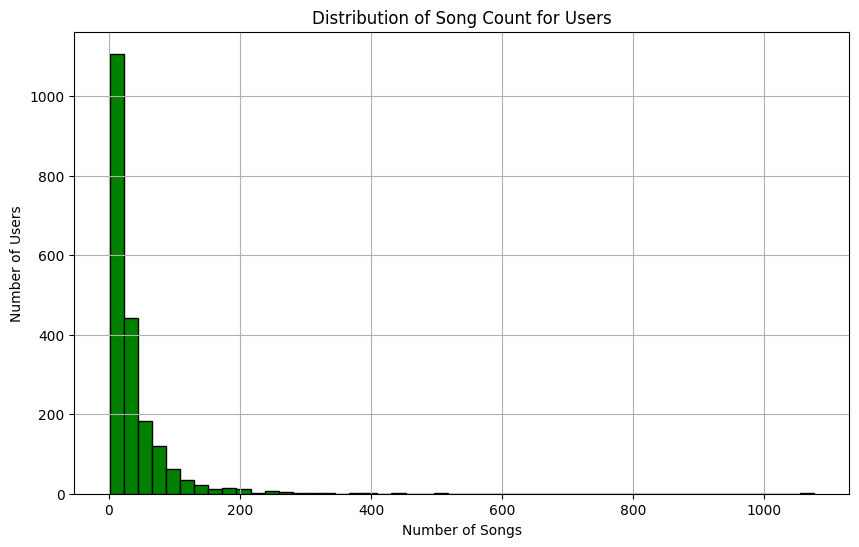

In [21]:
# Get the number of songs for each user
song_count_per_user = df_0.groupby('user')['song'].count()

# plot distribution
plt.figure(figsize=(10, 6))
plt.hist(song_count_per_user, bins=50, color='green', edgecolor='black')
plt.title('Distribution of Song Count for Users')
plt.xlabel('Number of Songs')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

## Implement a recommendation engine


-   Implement a recommendation engine which takes as input a user in the database and recommends one (or multiple) song(s) he has not listened to yet

### Use the SVD (Singular Value Decomposition) method in Surprise 

- **Create Reader and Dataset**:
     - Create a Reader object to define the scope of the reviews.
     - Create Dataset from DataFrame with created Reader.

In [22]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Create a Reader object to define the play_count range
reader = Reader(rating_scale=(0, df_0['play_count'].max()))

# Create a dataset from song_df dataframe
data = Dataset.load_from_df(df_0[['user', 'title', 'play_count']], reader)


- **Divide the data set into training set and test set**:
    - Use train_test_split to split the dataset into a training set and a test set.

In [23]:
# Divide the data into training set and test set
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


- **Building and Training SVD Model**:
    - Create SVD object.
    - Call the fit method to train the model.

In [24]:
# Collaborative Filtering using SVD
svd_model = SVD()
svd_model.fit(trainset)

- **For SVD**:
    - The predictions are made based on dimensionality reduction analysis of the evaluation matrix using SVD


- **The recommendation function uses Collaborative Filtering with SVD**

In [25]:
# A recommendation function using Collaborative Filtering with SVD
def collaborative_filtering_recommendation_svd(user_id, model, df):
    listened_songs = df[df['user'] == user_id]['title'].tolist()

    all_songs = df['title'].unique()
    unheard_songs = [song for song in all_songs if song not in listened_songs]

    recommendations = [(song, model.predict(user_id, song).est) for song in unheard_songs]

    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:10]
    
    return recommendations


- **Test**

In [26]:
from surprise import accuracy

# Make predictions on the test set
predictions = svd_model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)

RMSE: 1.1884


1.188364936028638

In [27]:
# User id 
user_id = '59bad0aea569a12d785e401d185f8814d128333e'

# Collaborative Filtering
collab_recommendations = collaborative_filtering_recommendation_svd(user_id, svd_model, df_0)

# Show result
print("Collaborative Filtering Recommendations:")
for recommendation in collab_recommendations: 
    print(f"Song: {recommendation[0]} - Estimate: {recommendation[1]}")

Collaborative Filtering Recommendations:
Song: The Big Gundown - Estimate: 2.9684752299996573
Song: Un Dia Gris - Estimate: 2.7983779495840135
Song: Ella Me Levanto - Estimate: 2.6943502425213834
Song: Youth Against Fascism - Estimate: 2.679681592770422
Song: Every Lasting Light - Estimate: 2.675231468934992
Song: Too Afraid To Love - Estimate: 2.664183762554492
Song: When The Stars Go Blue - Estimate: 2.6123921156031376
Song: Billy (Album Version) - Estimate: 2.606998837363834
Song: Recruiting Soldiers (2002 Digital Remaster) - Estimate: 2.589893238699174
Song: Guerrilla Monsoon Rap - Estimate: 2.5776616453262293


### Using KNNBasic

- **Building and Training KNNBasic Model**:
    - Create KNNBasic object.
    - Call the fit method to train the model.

****
- In the KNNBasic model, we can use sim_options to adjust how similarity is computed.
- In this case, I used **{'user_based': True}** to implement User-Based Collaborative Filtering.
- If you want to use Item-Based Collaborative Filtering, you can set **{'user_based': False}**.

In [28]:
from surprise import KNNBasic

# Collaborative Filtering sử dụng KNNBasic
knn_model = KNNBasic(sim_options={'user_based': True})
knn_model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


**The Recommendation function uses Collaborative Filtering with KNNBasic**

In [33]:
# The Recommendation function uses Collaborative Filtering with KNNBasic
def collaborative_filtering_recommendation_knn(user_id, model, df):
    listened_songs = df[df['user'] == user_id]['title'].tolist()

    all_songs = df['title'].unique()
    unheard_songs = [song for song in all_songs if song not in listened_songs]

    recommendations = [(song, model.predict(user_id, song).est) for song in unheard_songs]

    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:10]
    
    return recommendations

- **Test**

In [30]:
from surprise import accuracy

# Make predictions on the test set
predictions = knn_model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)

RMSE: 1.3795


1.379458151256937

In [31]:
# User id 
user_id = '59bad0aea569a12d785e401d185f8814d128333e'

# Collaborative Filtering
collab_recommendations = collaborative_filtering_recommendation_svd(user_id, knn_model, df_0)

# Show result
print("Collaborative Filtering Recommendations:")
for recommendation in collab_recommendations: 
    print(f"Song: {recommendation[0]} - Estimate: {recommendation[1]}")

Collaborative Filtering Recommendations:
Song: OMG - Estimate: 6
Song: Imma Be - Estimate: 6
Song: Irreplaceable - Estimate: 6
Song: Déjame Ir - Estimate: 6
Song: Always - Estimate: 6
Song: Para Volver A Amar - Estimate: 6
Song: Kansas City - Estimate: 6
Song: Move Ya Body - Estimate: 6
Song: Scherzo N. 1 - Estimate: 6
Song: Undo - Estimate: 5.999999999999999


### Content-Based Filtering (TF-IDF Vectorization)

- **TF-IDF Vectorization**
    - Use TF-IDF to vectorize song text attributes such as 'title', 'release', and 'artist_name'.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_0['title'] + ' ' + df_0['release'] + ' ' + df_0['artist_name'])


- **Calculate Cosine Similarity Matrix:**
    - Use linear_kernel to calculate cosine similarity matrix between songs.

In [35]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

- **Recommendation function based on Content-Based Filtering**

In [46]:
# Recommendation function based on Content-Based Filtering
def content_based_recommendation(user_id, song_title, df, cosine_similarities, n=5):
    song_index = df[df['title'] == song_title].index[0]
    similar_songs = list(enumerate(cosine_similarities[song_index]))
    similar_songs = sorted(similar_songs, key=lambda x: x[1], reverse=True)
    similar_songs = similar_songs[1:n+1]  

    # Get index of similar songs
    similar_songs_indices = [x[0] for x in similar_songs]

    # Filter dataframe to get information of similar songs
    recommendations = df_0.iloc[similar_songs_indices][['song', 'title', 'release', 'artist_name', 'year']]
    
    return recommendations

- **Test**

In [47]:
# Ví dụ cách sử dụng hàm đề xuất
user_id = '59bad0aea569a12d785e401d185f8814d128333e'
song_title = 'Water Line'
content_based_recommendations = content_based_recommendation(user_id, song_title, df, cosine_similarities)
pd.DataFrame(content_based_recommendations)

,song,title,release,artist_name,year
2478,SOZMJFG12AB017BDAF,Swimming In The Flood,Manners,Passion Pit,2009
16805,SOZMJFG12AB017BDAF,Swimming In The Flood,Manners,Passion Pit,2009
22195,SOZMJFG12AB017BDAF,Swimming In The Flood,Manners,Passion Pit,2009
97897,SOZMJFG12AB017BDAF,Swimming In The Flood,Manners,Passion Pit,2009
3066,SOSLQQJ12AB017BDCC,Sleepyhead,Manners,Passion Pit,2008


### Hybrid Methods

- **Surprise Collaborative Filtering:**
    - **Reader và Dataset**:
        - Create a Reader object to define your rating range and then create a Dataset from the DataFrame.
        - train_test_split: Split data into train and test exercises.
    - **SVD**: Collaborative Filtering model uses SVD (Singular Value Decomposition) from the Surprise library..

In [38]:
reader = Reader(rating_scale=(0, df_0['play_count'].max()))
data = Dataset.load_from_df(df_0[['user', 'title', 'play_count']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
cf_model = SVD()
cf_model.fit(trainset)

- **Content-Based Filtering:**
    - TfidfVectorizer : convertit les textes en matrices TF-IDF.
    - Linear_kernel : calcule la matrice de similarité cosinus entre les documents.

In [39]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_0['title'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

- **Function Content-Based Recommendations:**

In [48]:
# Function to get content-based recommendations
def content_based_recommendations(title):
    idx = df_0[df_0['title'] == song_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    song_indices = [i[0] for i in sim_scores]
    return df_0['title'].iloc[song_indices]

In [52]:
# Hybrid Recommender System
def hybrid_recommendations(user_id, title):
    # Collaborative Filtering prediction
    cf_prediction = cf_model.predict(user_id, title).est

    # Content-Based Filtering recommendations
    cb_recommendations = content_based_recommendations(title)

    # Combine predictions or recommendations using some weighting or voting mechanism
    hybrid_scores = [(cf_prediction, title) for title in cb_recommendations]

    # Sort and get top k suggestions
    hybrid_scores = sorted(hybrid_scores, key=lambda x: x[0], reverse=True)[:10]
    return [title for (_, title) in hybrid_scores]

- **Test**

In [53]:
# Example usage
user_id = '59bad0aea569a12d785e401d185f8814d128333e'
title = 'Water Line'
recommendations = hybrid_recommendations(user_id, title)
pd.DataFrame(recommendations)

,0
0,Swimming In The Flood
1,Swimming In The Flood
2,Swimming In The Flood
3,Swimming In The Flood
4,The Flood
5,The Flood
6,Like Swimming
7,Like Swimming
8,Like Swimming
9,Mind Flood


## Use Case 2: Using imputation processing value 0 in column year

- Replace the value 0 with the median value of the "year" column

In [59]:
df_year = df_song.copy()
median_year = df_year['year'].median()
df_year['year'] = df_year['year'].replace(0, median_year)

In [60]:
print(f"Shape of the dataset: {df_year.shape[0]} rows - {df_year.shape[1]} columns")

Shape of the dataset: 93099 rows - 7 columns


## Exploratory Data Analysis
- What are the most listened songs?
- Who are the most popular artists?
- How is the distribution of song count for users?

### What are the most listened songs?

In [65]:
# Calculate the total number of listens for each song
total_listen_count_year = df_year.groupby('title')['play_count'].sum()

# sorted by total number of listens in descending order
most_listened_songs_year = total_listen_count_year.sort_values(ascending=False)

# Displays the 10 most listened to songs
top_10_songs_year = pd.DataFrame(most_listened_songs_year.nlargest(10))

# Show result
print("Top 10 most listened songs with total listen count:")
top_10_songs_year

Top 10 most listened songs with total listen count:


,play_count
title,
Sehr kosmisch,417
Dog Days Are Over (Radio Edit),348
Use Somebody,340
Undo,333
Secrets,320
You're The One,316
Somebody To Love,293
Yellow,286
Revelry,281


### Who are the most popular artists

In [67]:
# the total number of listens for each artist
total_listen_count_by_artist_year = df_year.groupby('artist_name')['play_count'].sum()

# Sort by total number of listens in descending order
most_popular_artists_year = total_listen_count_by_artist_year.sort_values(ascending=False)

# Showing the 10 most popular artists
top_10_artists_year = pd.DataFrame(most_popular_artists_year.head(10))

# Display result 
top_10_artists_year

,play_count
artist_name,
Coldplay,1376
The Black Keys,1153
Kings Of Leon,966
Florence + The Machine,870
Eminem,840
Justin Bieber,774
Jack Johnson,764
Muse,664
Daft Punk,651


### How is the distribution of song count for users?

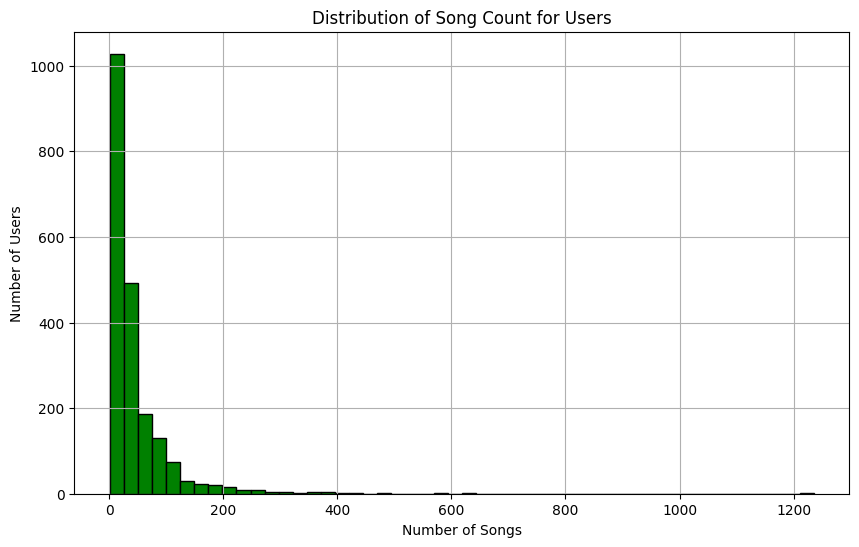

In [68]:
# Get the number of songs for each user
song_count_per_user_year = df_year.groupby('user')['song'].count()

# plot distribution
plt.figure(figsize=(10, 6))
plt.hist(song_count_per_user_year, bins=50, color='green', edgecolor='black')
plt.title('Distribution of Song Count for Users')
plt.xlabel('Number of Songs')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

## Implement a recommendation engine


-   Implement a recommendation engine which takes as input a user in the database and recommends one (or multiple) song(s) he has not listened to yet

### Use the SVD (Singular Value Decomposition) method in Surprise 


In [72]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Create a Reader object to define the play_count range
reader_1 = Reader(rating_scale=(0, df_year['play_count'].max()))

# Create a dataset from song_df dataframe
data_1 = Dataset.load_from_df(df_year[['user', 'title', 'play_count']], reader_1)

# Divide the data into training set and test set
trainset_1, testset_1 = train_test_split(data_1, test_size=0.2, random_state=42)

# Collaborative Filtering using SVD
svd_model_1 = SVD()
svd_model_1.fit(trainset_1)

# A recommendation function using Collaborative Filtering with SVD
def collaborative_filtering_recommendation_svd(user_id, model, df):
    listened_songs = df[df['user'] == user_id]['title'].tolist()

    all_songs = df['title'].unique()
    unheard_songs = [song for song in all_songs if song not in listened_songs]

    recommendations = [(song, model.predict(user_id, song).est) for song in unheard_songs]

    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:10]
    
    return recommendations

# Test
# User id 
user_id = '59bad0aea569a12d785e401d185f8814d128333e'

# Collaborative Filtering
collab_recommendations_1 = collaborative_filtering_recommendation_svd(user_id, svd_model_1, df_year)

# Show result
print("Collaborative Filtering Recommendations:")
for recommendation in collab_recommendations_1: 
    print(f"Song: {recommendation[0]} - Estimate: {recommendation[1]}")

Collaborative Filtering Recommendations:
Song: The Big Gundown - Estimate: 3.207087494192188
Song: Un Dia Gris - Estimate: 2.9533952631127858
Song: Esperame - Estimate: 2.8521043245029847
Song: Too Afraid To Love - Estimate: 2.8281788881109593
Song: Mercy:The Laundromat - Estimate: 2.8258489224555996
Song: Strani Amori - Estimate: 2.7913393395347788
Song: Greece 2000 - Estimate: 2.7355150702065707
Song: Horizon Variations - Estimate: 2.7120653655460734
Song: Through The Fire And Flames (Album Version) - Estimate: 2.711423435643931
Song: Tell Me Why - Estimate: 2.6909896465373295


- The result when we removed value year=0
    - Collaborative Filtering Recommendations:
    - Song: The Big Gundown - Estimate: 2.9684752299996573
    - Song: Un Dia Gris - Estimate: 2.7983779495840135
    - Song: Ella Me Levanto - Estimate: 2.6943502425213834
    - Song: Youth Against Fascism - Estimate: 2.679681592770422
    - Song: Every Lasting Light - Estimate: 2.675231468934992
    - Song: Too Afraid To Love - Estimate: 2.664183762554492
    - Song: When The Stars Go Blue - Estimate: 2.6123921156031376
    - Song: Billy (Album Version) - Estimate: 2.606998837363834
    - Song: Recruiting Soldiers (2002 Digital Remaster) - Estimate: 2.589893238699174
    - Song: Guerrilla Monsoon Rap - Estimate: 2.5776616453262293

In [73]:
from surprise import accuracy

# Make predictions on the test set
predictions_1 = svd_model_1.test(testset_1)

# Evaluate the model
accuracy.rmse(predictions_1)

RMSE: 1.1952


1.1951817564063523